# Sandbox for testing purposes

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.linalg import block_diag

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
# from cereeberus.data.ex_mergetrees import randomMergeTree

from cereeberus.distance.interleave import Interleave
from cereeberus.distance.labeled_blocks import LabeledBlockMatrix as LBM 
from cereeberus.distance.labeled_blocks import LabeledMatrix as LM

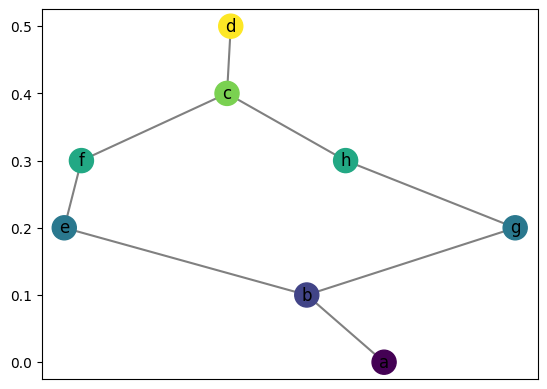

In [2]:
T = ex_mg.torus()
T.draw()

In [3]:
T = ex_mg.torus(0, 2, 10, 12, delta = 1, seed = 17)
L = ex_mg.line(0, 12)

myInt = Interleave(T, L, initialize_random_maps=False)
myInt.set_random_assignment(random_n = False)




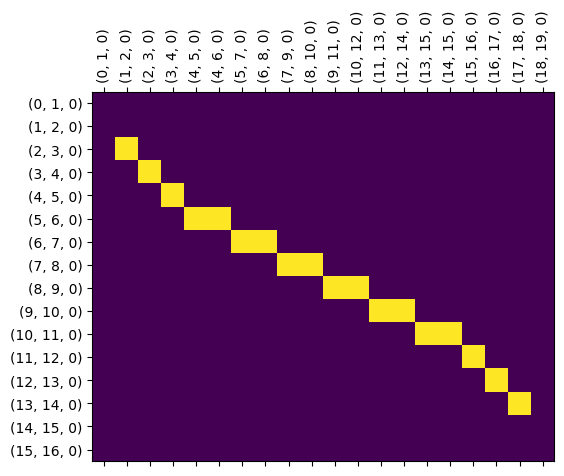

In [4]:
myInt.phi('n', 'E').draw()

LabeledBlockMatrix(matrices={-2: LabeledMatrix(
array=
[], 
rows=[0], 
cols=[]), -1: LabeledMatrix(
array=
[], 
rows=[1], 
cols=[]), 0: LabeledMatrix(
array=
[[0.]], 
rows=[2], 
cols=['a']), 1: LabeledMatrix(
array=
[[0.]], 
rows=[3], 
cols=['e']), 2: LabeledMatrix(
array=
[[0.]], 
rows=[4], 
cols=['b']), 3: LabeledMatrix(
array=
[[0. 0.]], 
rows=[5], 
cols=['f', 'm']), 4: LabeledMatrix(
array=
[[0. 0.]], 
rows=[6], 
cols=['g', 'n']), 5: LabeledMatrix(
array=
[[0. 0.]], 
rows=[7], 
cols=['h', 'o']), 6: LabeledMatrix(
array=
[[0. 0.]], 
rows=[8], 
cols=['i', 'p']), 7: LabeledMatrix(
array=
[[0. 0.]], 
rows=[9], 
cols=['j', 'q']), 8: LabeledMatrix(
array=
[[0. 0.]], 
rows=[10], 
cols=['k', 'r']), 9: LabeledMatrix(
array=
[[0. 0.]], 
rows=[11], 
cols=['l', 's']), 10: LabeledMatrix(
array=
[[0.]], 
rows=[12], 
cols=['c']), 11: LabeledMatrix(
array=
[[0.]], 
rows=[13], 
cols=['t']), 12: LabeledMatrix(
array=
[[0.]], 
rows=[14], 
cols=['d']), 13: LabeledMatrix(
array=
[], 
rows=[15], 
cols=[

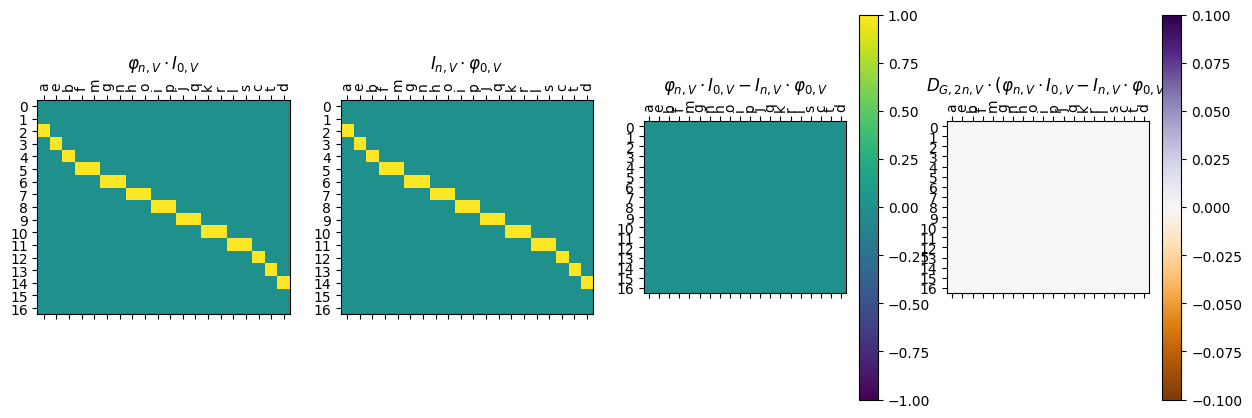

In [5]:
myInt.parallelogram(draw = True)

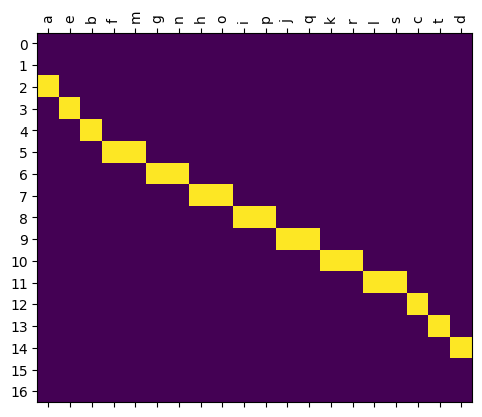

In [6]:
out = myInt.phi('n','V') @ myInt.I('F','0','V')
out.draw()

<Axes: >

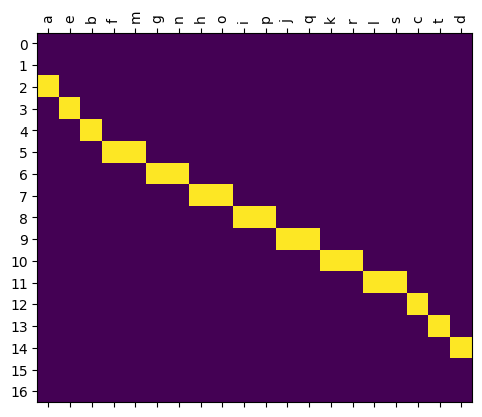

In [7]:
out = myInt.phi('n','V').to_labeled_matrix() @ myInt.I('F','0','V').to_labeled_matrix()
out.draw()

In [45]:
A = myInt.phi('n','V') 
B =  myInt.I('F','0','V')

all_keys = list(set(A.blocks.keys()) | set(B.blocks.keys()))
all_keys.sort()
all_keys



[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [37]:
myInt.phi('n','V').to_labeled_matrix()


LabeledMatrix(
array=
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]], 
rows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 
cols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [21]:

# Make sure all the matrices have the right row and column labels 


#--- Phi ---# 

# Checks that the intial setting of Phi is correct

for key, nextkey in [('0','n'), ('n', '2n')]:
    for obj_type in ['V', 'E']:
        myphi = myInt.phi(key, obj_type)
        cols = myInt.F(key).sorted_vertices() if obj_type == 'V' else myInt.F(key).sorted_edges()
        rows = myInt.G(nextkey).sorted_vertices() if obj_type == 'V' else myInt.G(nextkey).sorted_edges()
        if not myphi.get_all_rows() == rows:
            print('rows')
            print(f'key: {key}, nextkey: {nextkey}, obj_type: {obj_type}')
            print(myphi.get_all_rows())
            print(rows)
            print('---')
        if not myphi.get_all_cols() == cols:
            print('cols')
            print(f'key: {key}, nextkey: {nextkey}, obj_type: {obj_type}')
            print(myphi.get_all_cols())
            print(cols)
            print('---')


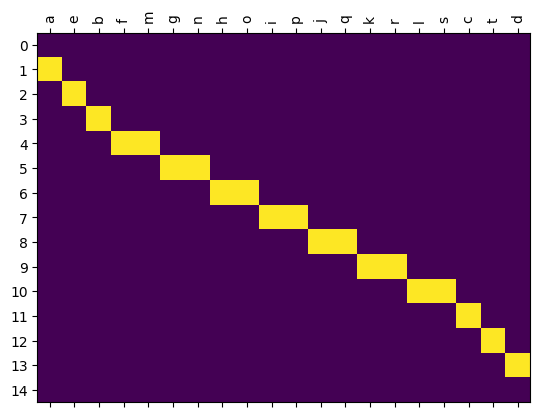

In [7]:
key, next_key = '0', 'n'
obj_type = 'E' 
myphi = myInt.phi(key)
myphi.draw()

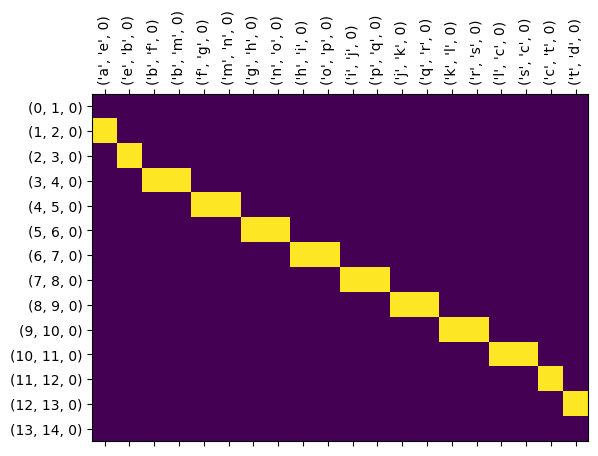

In [12]:
LBM(None, 
        myInt.val_to_edges['G']['n'], 
        myInt.val_to_edges['F']['0'],
        random_initialize = True).draw()

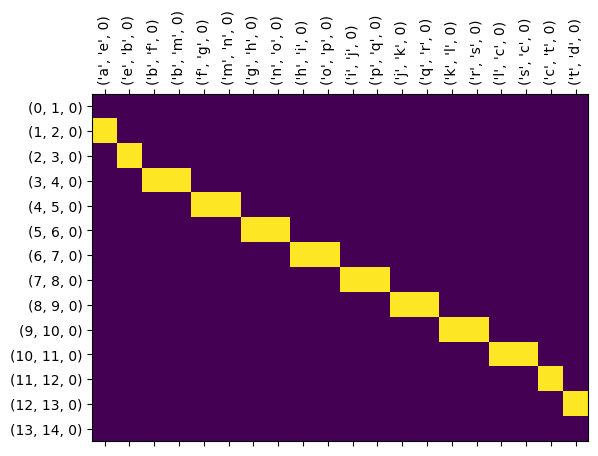

In [16]:
myInt.set_random_assignment()

myInt.phi('0', 'E').draw()